# This page presents time series analysing to make data stationary before analysing and rest of statistics
# As input data the dataset without feature engineering were taken 

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels

In [3]:
# this are periods when 1,2,3,4 HEs were under operation
time_periods = [
    ("2022-09-12","2022-09-13"),
    ("2022-10-17","2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
    ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
    ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23"), ("2023-01-10","2023-01-13"), 
    ("2023-01-16","2023-01-19"), ("2023-01-24","2023-01-27"), ("2023-01-31","2023-02-03"), 
    ("2023-02-07","2023-02-09"), ("2023-02-13","2023-02-17"), ("2023-02-28","2023-03-03"), 
    ("2023-03-06","2023-03-07"), ("2023-03-09","2023-03-10"), ("2023-03-14","2023-03-17"),
    ("2023-03-27","2023-03-31"), ("2023-04-03","2023-04-07"), ("2023-04-10","2023-04-14"),
]

time_periods2 = [
    ("2021-09-06","2021-09-10"), ("2021-09-13","2021-09-17"), ("2021-09-20","2021-10-01"),
    ("2021-10-04","2021-10-08"), ("2021-10-11","2021-10-15"), ("2021-11-08","2021-11-12"),
    ("2021-11-15","2021-11-19"), ("2021-11-22","2021-11-26"), ("2021-11-29","2021-12-03"),
    ("2021-12-07","2021-12-03"), ("2021-12-13","2021-12-17"), ("2021-12-20","2021-12-24"),
    ("2022-01-18","2022-01-21"), ("2022-01-24","2022-01-26"), ("2022-02-01","2022-02-04"),
    ("2022-02-08","2022-02-11"), ("2022-02-14","2022-02-18"), ("2022-02-24","2022-02-25"),
    ("2022-03-01","2022-03-04"), ("2022-03-15","2022-03-18"), ("2022-03-21","2022-03-25"),
    ("2022-03-29","2022-04-01"), ("2022-04-12","2022-04-15"), ("2022-04-18","2022-04-22"),
    ("2022-05-02","2022-05-06"), ("2022-05-09","2022-05-13"), ("2022-05-16","2022-05-20"),
    ("2022-05-23","2022-05-27"), ("2022-06-07","2022-06-10"), ("2022-06-20","2022-06-24"),
    ("2022-06-28","2022-07-01"),
    
]

time_periods3 = [
    ("2020-10-12","2020-10-16"), ("2020-10-21","2020-10-23"), ("2020-10-28","2020-10-30"),
    ("2020-11-11","2020-11-13"), ("2020-11-16","2020-11-20"), ("2020-11-24","2020-11-27"),
    ("2020-12-03","2020-12-04"), ("2020-12-07","2020-12-11"), ("2020-12-16","2020-12-18"), 
    ("2020-12-24","2020-12-25"), ("2020-12-29","2020-12-30"), ("2021-01-12","2021-01-15"),
    ("2021-01-18","2021-01-22"), ("2021-02-01","2021-02-05"), ("2021-02-08","2021-02-12"),
    ("2021-02-15","2021-02-19"), ("2021-03-01","2021-03-05"), ("2021-03-09","2021-03-12"),
    ("2021-03-15","2021-03-19"), ("2021-03-22","2021-03-26"), ("2021-04-01","2021-04-02"),
    ("2021-04-05","2021-04-09"), ("2021-04-05","2021-04-09"), ("2021-04-12","2021-04-16"),
    ("2021-04-20","2021-04-24"), ("2021-04-26","2021-04-30"), ("2021-05-03","2021-05-07"),
    ("2021-05-11","2021-05-15"), ("2021-05-17","2021-05-21"), ("2021-05-24","2021-05-28"),
    ("2021-06-15","2021-06-18"), ("2021-06-21","2021-06-25"), ("2021-06-28","2021-07-02"),
]

In [4]:
fcs = [
    ("2021-03-09", "2021-04-12"), ("2021-04-12", "2021-05-11"), ("2021-05-11", "2021-09-20")
]

In [5]:
time_periods_all = [*time_periods3, *time_periods2, *time_periods]

### All IDs used
* 299 Т1к после ТО
* 309 Р2контура
* 315 T1k before HE
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 321 T reactor
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1k
* 481 Q2контура
#### Second loop I pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [6]:
sys.path.insert(0, os.path.split(os.path.abspath(""))[0])
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [7]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates
from statistics import Statistics as st
from data_engineering import PeriodicDataPreprocess, FeatureEngineering
from statistics import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima import model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import acf, pacf, ccf

In [8]:
df = pd.read_excel("rdy_for_fe_121020_to_210423.xlsx", index_col="Timestamp")
df_nosma = pd.read_excel("rdy_for_fe_121020_to_210423_no_sma.xlsx", index_col="Timestamp")



In [8]:
df_stats = pd.read_excel("rdy_for_stats_121020_210423.xlsx", index_col="Timestamp")

# I assume that data of winter of 2021 is not clear cuz Tair is hardly reach -5
# However usually it dropsbelow -20 -> absolutly anomaly data
## Data till april of 2021 has dropped

In [173]:
df_stats = df_stats.loc["2021-04":, :]

In [305]:
df_stats_gr = df_stats.groupby(pd.Grouper(freq="2h")).mean()

In [306]:
df_stats_gr.columns

Index(['CTF1', 'CTF2', 'CTF3', 'P2', 'Q2', 'T1aHE', 'T1bHE', 'T2aHE', 'T2aHE1',
       'T2aHE2', 'T2aHE3', 'T2aHE4', 'T2aHE5', 'T2bHE', 'Tair', 'Treactor',
       'p21', 'p22', 'p23', 'p24', 'dt1', 'dt2', 'pumps2', 'dt_circuits_coef',
       'dt_circuits_coef_delta', 'I2mean', 'QbyIP', 'HE1_TOP', 'HE2_TOP',
       'HE3_TOP', 'HE4_TOP', 'HE5_TOP', 'HE1_status', 'HE2_status',
       'HE3_status', 'HE4_status', 'HE5_status', 'QbyIP_HEs_num',
       'QbyIP_HEs_pumps_num', 'Ndis_def', 'Ndis_by_delta',
       'Ndis_by_del_HEs_num', 'dt2_by_HEs', 'ff', 'HE_TOP_mean', 'CTF_sum'],
      dtype='object')

<AxesSubplot: xlabel='QbyIP', ylabel='Count'>

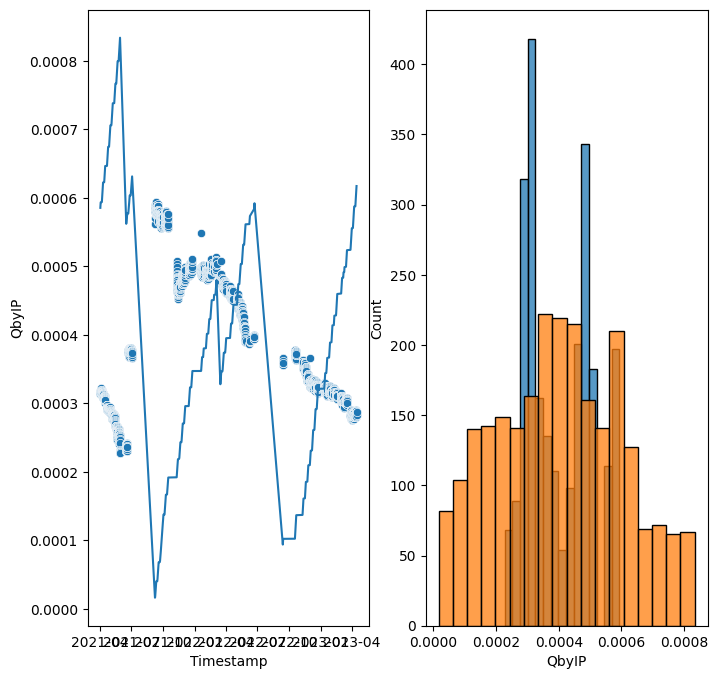

In [307]:
fig, axs = plt.subplots(1,2, figsize=(8,8))
sns.scatterplot(df_stats_gr["QbyIP"]/df_stats_gr["QbyIP"].sum(), ax=axs[0])
sns.lineplot(df_stats_gr["HE_TOP_mean"]/df_stats_gr["HE_TOP_mean"].sum(), ax=axs[0])
sns.histplot(df_stats_gr["QbyIP"]/df_stats_gr["QbyIP"].sum(), ax=axs[1])
sns.histplot(df_stats_gr["HE_TOP_mean"]/df_stats_gr["HE_TOP_mean"].sum(), ax=axs[1])



# Once again We may observe differend cycles which depends on whether new HE were taken to operation
## So now df going to be split by HEs in operation and their swaps

Timestamp
2021-04-01 20:00:00    10.735460
2021-04-01 22:00:00    10.674293
2021-04-02 00:00:00    10.655442
2021-04-02 02:00:00    10.623769
2021-04-02 04:00:00    10.603075
                         ...    
2021-05-28 14:00:00     7.790070
2021-05-28 16:00:00     7.739506
2021-05-28 18:00:00     7.715087
2021-05-28 20:00:00     7.705580
2021-05-28 22:00:00     7.678108
Name: QbyIP, Length: 375, dtype: float64


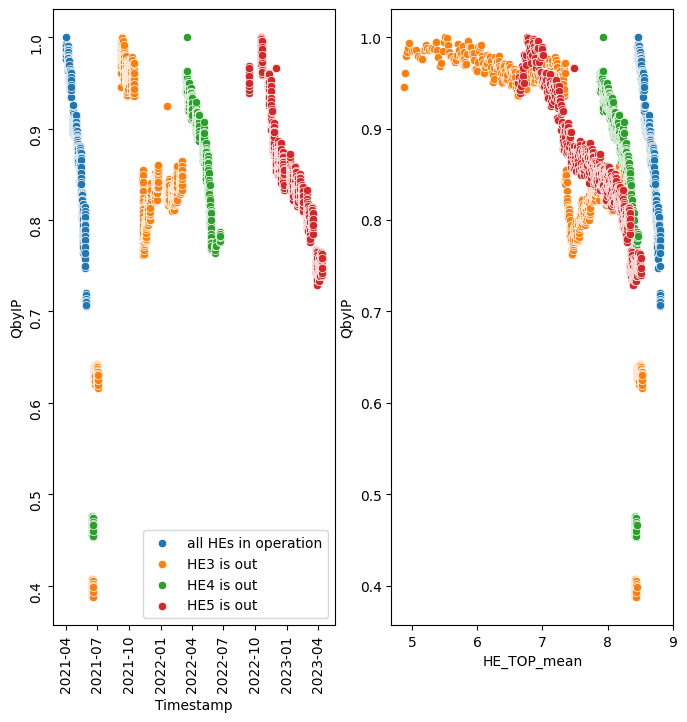

In [308]:

fig, axs = plt.subplots(1,2, figsize=(8,8))

qbyip = df_stats_gr["QbyIP"]

qbyip_all = qbyip[
    (df_stats_gr["HE3_status"] != 0)
    & (df_stats_gr["HE4_status"] != 0)
    & (df_stats_gr["HE5_status"] != 0)
    
].dropna(axis=0)
qbyip3 = qbyip[df_stats_gr["HE3_status"] == 0].dropna(axis=0)
qbyip4 = qbyip[df_stats_gr["HE4_status"] == 0].dropna(axis=0)
qbyip5 = qbyip[df_stats_gr["HE5_status"] == 0].dropna(axis=0)

print(qbyip_all)

hetop_all = df_stats_gr[
    (df_stats_gr["HE3_status"] != 0)
    & (df_stats_gr["HE4_status"] != 0)
    & (df_stats_gr["HE5_status"] != 0)
    
]["HE_TOP_mean"].dropna(axis=0)
hetop3 = df_stats_gr[df_stats_gr["HE3_status"] == 0]["HE_TOP_mean"].dropna(axis=0)
hetop4 = df_stats_gr[df_stats_gr["HE4_status"] == 0]["HE_TOP_mean"].dropna(axis=0)
hetop5 = df_stats_gr[df_stats_gr["HE5_status"] == 0]["HE_TOP_mean"].dropna(axis=0)


sns.scatterplot(qbyip_all / qbyip_all.max(), ax=axs[0], label="all HEs in operation")
sns.scatterplot(qbyip3 / qbyip3.max(), ax=axs[0], label="HE3 is out")
sns.scatterplot(qbyip4 / qbyip4.max(), ax=axs[0], label="HE4 is out")
sns.scatterplot(qbyip5 / qbyip5.max(), ax=axs[0], label="HE5 is out")
# sns.lineplot(df_stats_gr["HE_TOP_mean"]/df_stats_gr["HE_TOP_mean"].max(), ax=axs[0])

sns.scatterplot(x=np.log(hetop_all), y=qbyip_all / qbyip_all.max(), ax=axs[1])
sns.scatterplot(x=np.log(hetop3), y=qbyip3 / qbyip3.max(), ax=axs[1])
sns.scatterplot(x=np.log(hetop4), y=qbyip4 / qbyip4.max(), ax=axs[1])
sns.scatterplot(x=np.log(hetop5), y=qbyip5 / qbyip5.max(), ax=axs[1])

axs[0].tick_params(rotation=90)
# sns.scatterplot(qbyip / df_stats.loc[:, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1))

In [309]:
qbyip_all

Timestamp
2021-04-01 20:00:00    10.735460
2021-04-01 22:00:00    10.674293
2021-04-02 00:00:00    10.655442
2021-04-02 02:00:00    10.623769
2021-04-02 04:00:00    10.603075
                         ...    
2021-05-28 14:00:00     7.790070
2021-05-28 16:00:00     7.739506
2021-05-28 18:00:00     7.715087
2021-05-28 20:00:00     7.705580
2021-05-28 22:00:00     7.678108
Name: QbyIP, Length: 375, dtype: float64

# On a first look, all curve habe similar trend no matter what HEs are in operation
# However, the cycles that starts from 0 (HE_TOP_mean) have 2 different trends
# It's quite obvious that each cycle is non-stationry regarding QbyIP
# Lets take a look on dt

In [310]:
df_all = df_stats_gr.loc[qbyip_all.index, :]

In [311]:
df_all = df_all.reset_index()

In [312]:
df_all["pumps2"].value_counts()

234.0     325
1234.0     50
Name: pumps2, dtype: int64

<AxesSubplot: xlabel='dt1', ylabel='Count'>

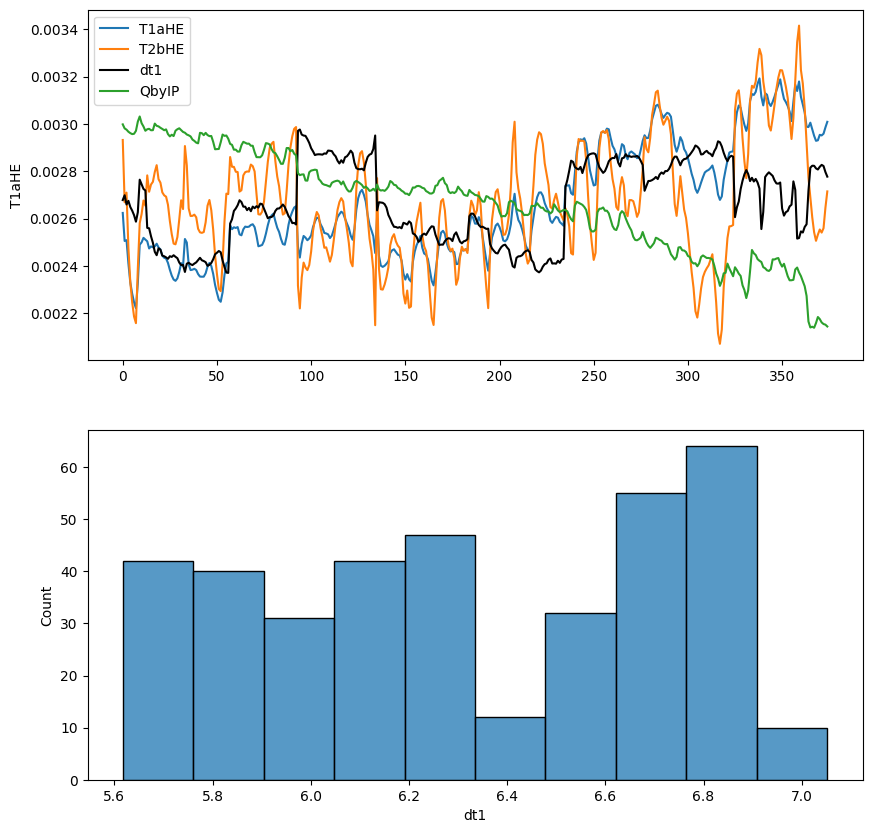

In [313]:
# dt1 distributed pretty random so there is dependent parameter --> fuel cycle

fig, axs = plt.subplots(2,1, figsize=(10,10))

sns.lineplot(df_all["T1aHE"] / df_all["T1aHE"].sum(), ax=axs[0], label="T1aHE")
sns.lineplot(df_all["T2bHE"] / df_all["T2bHE"].sum(), ax=axs[0], label="T2bHE")
sns.lineplot(df_all["dt1"] / df_all["dt1"].sum(), ax=axs[0], color="black", label="dt1")

sns.lineplot(df_all["QbyIP"] / df_all["QbyIP"].sum(), ax=axs[0], label="QbyIP")


sns.histplot(df_all["dt1"], ax=axs[1])


In [314]:
print(scipy.stats.kendalltau(df_all["T2bHE"], df_all["T1aHE"]))
print(scipy.stats.kendalltau(df_all["QbyIP"], df_all["T1aHE"]))
print(scipy.stats.kendalltau(df_all["T2bHE"], df_all["dt1"]))

SignificanceResult(statistic=0.488855614973262, pvalue=2.3446909616040264e-45)
SignificanceResult(statistic=-0.5633511586452763, pvalue=1.204136772631318e-59)
SignificanceResult(statistic=-0.11264171122994653, pvalue=0.0011269851782062157)


In [315]:
# splitting df_all on fuel cycles and look up at data again
df_all_fc119 = df_all[
    (df_all["Timestamp"] > fcs[0][0])
    & (df_all["Timestamp"] < fcs[0][1])
]

df_all_fc120 = df_all[
    (df_all["Timestamp"] > fcs[1][0])
    & (df_all["Timestamp"] < fcs[1][1])
]

df_all_fc121 = df_all[
    (df_all["Timestamp"] > fcs[2][0])
    & (df_all["Timestamp"] < fcs[2][1])
]

<AxesSubplot: ylabel='CTF_sum'>

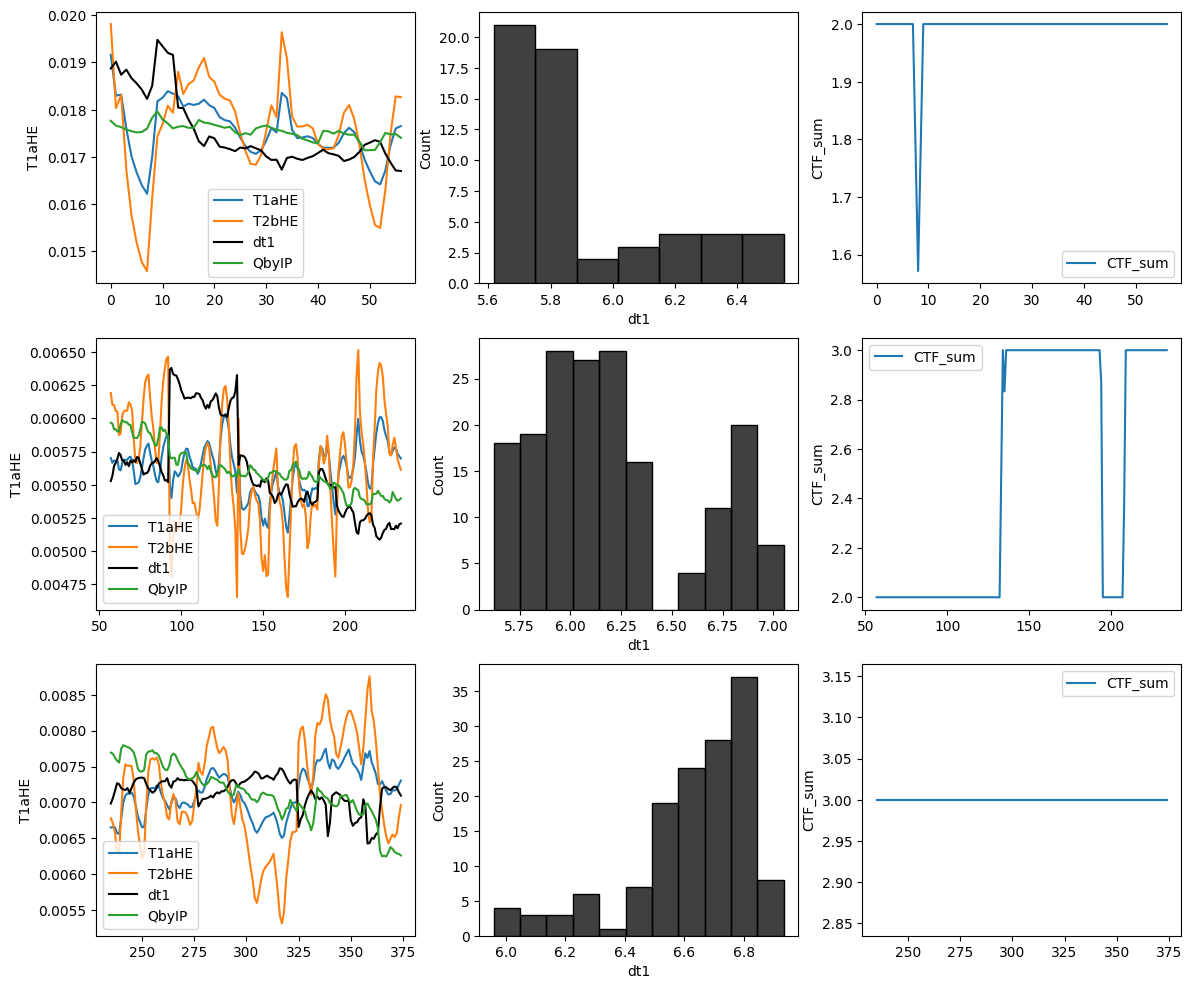

In [316]:
# dt1 distributed pretty random so there is dependent parameter --> fuel cycle

fig, axs = plt.subplots(3,3, figsize=(14,12))

sns.lineplot(df_all_fc119["T1aHE"] / df_all_fc119["T1aHE"].sum(), ax=axs[0][0], label="T1aHE")
sns.lineplot(df_all_fc119["T2bHE"] / df_all_fc119["T2bHE"].sum(), ax=axs[0][0], label="T2bHE")
sns.lineplot(df_all_fc119["dt1"] / df_all_fc119["dt1"].sum(), ax=axs[0][0], color="black", label="dt1")

sns.lineplot(df_all_fc119["QbyIP"] / df_all_fc119["QbyIP"].sum(), ax=axs[0][0], label="QbyIP")


sns.lineplot(df_all_fc120["T1aHE"] / df_all_fc120["T1aHE"].sum(), ax=axs[1][0], label="T1aHE")
sns.lineplot(df_all_fc120["T2bHE"] / df_all_fc120["T2bHE"].sum(), ax=axs[1][0], label="T2bHE")
sns.lineplot(df_all_fc120["dt1"] / df_all_fc120["dt1"].sum(), ax=axs[1][0], color="black", label="dt1")

sns.lineplot(df_all_fc120["QbyIP"] / df_all_fc120["QbyIP"].sum(), ax=axs[1][0], label="QbyIP")


sns.lineplot(df_all_fc121["T1aHE"] / df_all_fc121["T1aHE"].sum(), ax=axs[2][0], label="T1aHE")
sns.lineplot(df_all_fc121["T2bHE"] / df_all_fc121["T2bHE"].sum(), ax=axs[2][0], label="T2bHE")
sns.lineplot(df_all_fc121["dt1"] / df_all_fc121["dt1"].sum(), ax=axs[2][0], color="black", label="dt1")

sns.lineplot(df_all_fc121["QbyIP"] / df_all_fc121["QbyIP"].sum(), ax=axs[2][0], label="QbyIP")


sns.histplot(df_all_fc119["dt1"], ax=axs[0][1], color="black", label="dt1")
sns.histplot(df_all_fc120["dt1"], ax=axs[1][1], color="black", label="dt1")
sns.histplot(df_all_fc121["dt1"], ax=axs[2][1], color="black", label="dt1")



sns.lineplot(df_all_fc119["CTF_sum"], ax=axs[0][2], label="CTF_sum")
sns.lineplot(df_all_fc120["CTF_sum"], ax=axs[1][2], label="CTF_sum")
sns.lineplot(df_all_fc121["CTF_sum"], ax=axs[2][2],  label="CTF_sum")


<AxesSubplot: >

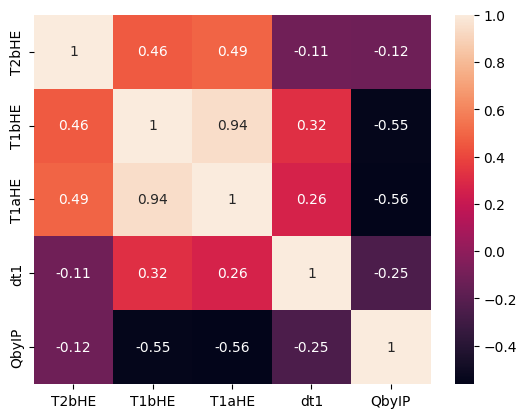

In [317]:
sns.heatmap(df_all.loc[:, ["T2bHE", "T1bHE", "T1aHE", "dt1", "QbyIP"]].corr(method="kendall"), annot=True)

# The dt1 for each fuel cycle has its own range
# From plots above there is a delayed correlation between T2bHE and dt1:
## The T2bHE can be considered as input
## The dt1 as output

In [735]:
t2bhe_all = df_all["T2bHE"]
dt1_all_raw = df_all["dt1"]

In [736]:
# check data for stationarity
ts_t2bhe_all, np_t2bhe_all = TimeSeries(t2bhe_all), NonParametric(t2bhe_all)
ts_dt1_all, np_dt1_all = TimeSeries(dt1_all_raw), NonParametric(dt1_all_raw)

In [737]:
ts_t2bhe_all.run_tests()
ts_dt1_all.run_tests()

Made <ADF> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The time series is stationary (or trend-stationary)
pvalue of test is 0.009

Made <KPSS> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The time series is non-stationary
pvalue of test is 0.019

Made <ADF> test:
 Fail to reject H0 hypothesis:
 Verdict: There is a unit root in data (non-stationary)
pvalue of test is 0.104

Made <KPSS> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The time series is non-stationary
pvalue of test is 0.015



In [740]:
np_t2bhe_all.run_tests()


Made <KRUSKAL> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Population medians are not equal
pvalue of test is 0.000

Made <WILCOXON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Medians of two samples are different
pvalue of test is 0.000

Made <MANNWHITNEYU> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Two populations are not equal
pvalue of test is 0.000

Made <NORMALTEST> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.033

Made <SHAPIRO> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.004

Made <ANDERSON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.001



In [741]:
np_dt1_all.run_tests()

Made <KRUSKAL> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Population medians are not equal
pvalue of test is 0.000

Made <WILCOXON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Medians of two samples are different
pvalue of test is 0.000

Made <MANNWHITNEYU> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Two populations are not equal
pvalue of test is 0.000

Made <NORMALTEST> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <SHAPIRO> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <ANDERSON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000



In [742]:
# check ccf
ccf_all = scipy.signal.correlate(t2bhe_all, dt1_all_raw)

Text(0.5, 1.0, 'pacf for T2bHE')

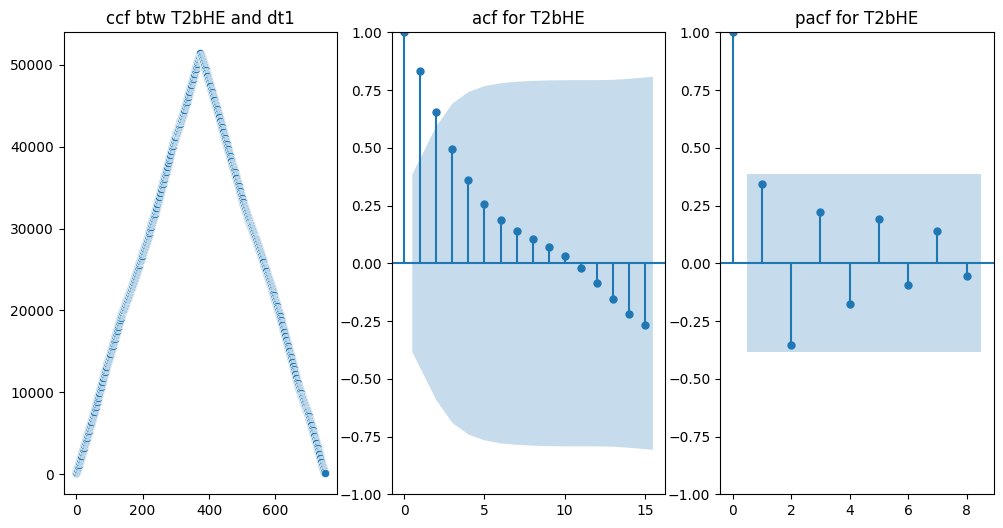

In [743]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.scatterplot(ccf_all, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(t2bhe_all), ax=axs[1])
axs[1].set_title("acf for T2bHE")

plot_pacf(pacf(t2bhe_all), lags=8, ax=axs[2])
axs[2].set_title("pacf for T2bHE")


Text(0.5, 1.0, 'pacf for T2bHE after diff')

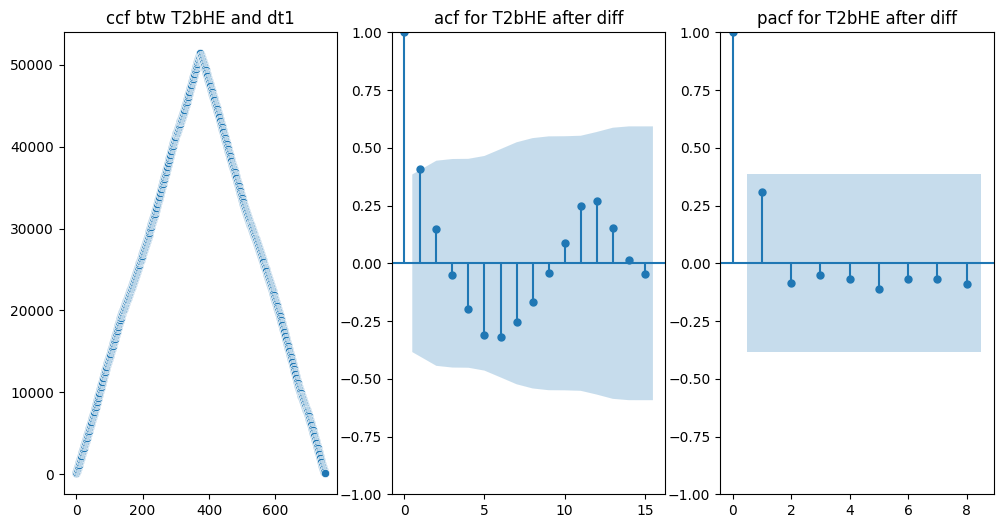

In [744]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.scatterplot(ccf_all, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(t2bhe_all.diff().dropna()), ax=axs[1])
axs[1].set_title("acf for T2bHE after diff")

plot_pacf(pacf(t2bhe_all.diff().dropna()), lags=8, ax=axs[2])
axs[2].set_title("pacf for T2bHE after diff")


Text(0.5, 1.0, 'pacf for dt1')

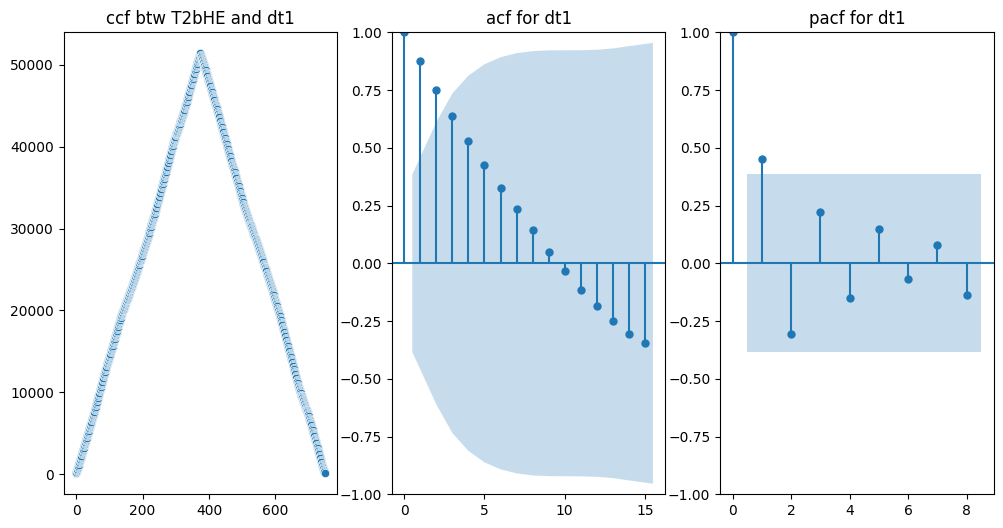

In [746]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.scatterplot(ccf_all, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(dt1_all_raw), ax=axs[1])
axs[1].set_title("acf for dt1")

plot_pacf(pacf(dt1_all_raw), lags=8, ax=axs[2])
axs[2].set_title("pacf for dt1")


Text(0.5, 1.0, 'pacf for dt1 after diff')

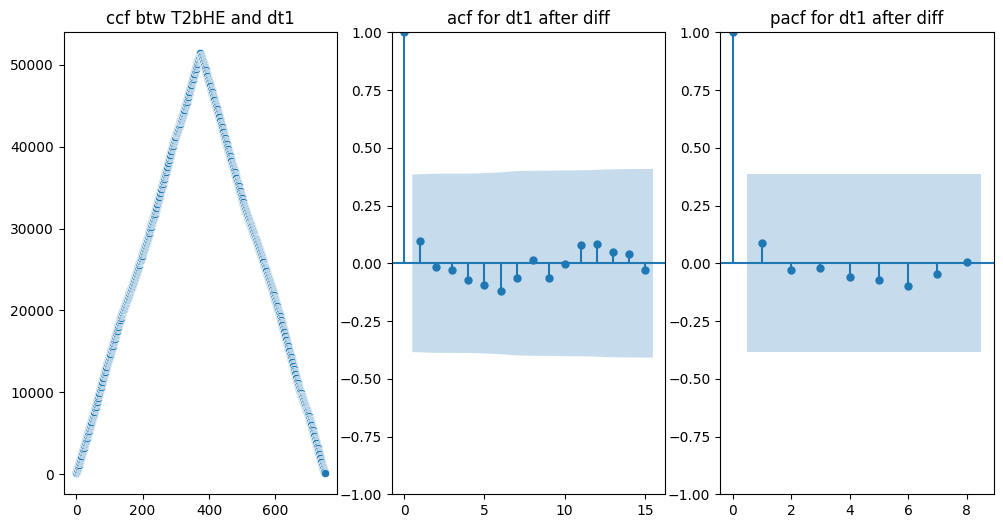

In [747]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.scatterplot(ccf_all, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(dt1_all_raw.diff().dropna()), ax=axs[1])
axs[1].set_title("acf for dt1 after diff")

plot_pacf(pacf(dt1_all_raw.diff().dropna()), lags=8, ax=axs[2])
axs[2].set_title("pacf for dt1 after diff")


# tests and plots avobe report that data is non-stationary

In [748]:
length_all = len(df_all)

In [749]:
train_all_ind = int(length_all*0.8)
test_all_ind = length_all

In [750]:
train_all, test_all = df_all[ : train_all_ind], df_all[train_all_ind : test_all_ind]

In [751]:
df_all

,Timestamp,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,...,HE5_status,QbyIP_HEs_num,QbyIP_HEs_pumps_num,Ndis_def,Ndis_by_delta,Ndis_by_del_HEs_num,dt2_by_HEs,ff,HE_TOP_mean,CTF_sum
0,2021-04-01 20:00:00,1.0,1.0,0.0,0.41,653.628889,42.237482,48.583810,30.445497,0.311027,...,1.0,2.147092,0.429418,70.747996,2.861104,0.572221,0.274478,0.830831,4712.453820,2.0
1,2021-04-01 22:00:00,1.0,1.0,0.0,0.41,651.315833,40.330685,46.725073,28.329850,0.310404,...,1.0,2.134859,0.426972,70.625390,2.823698,0.564740,0.273422,0.819969,4717.411749,2.0
2,2021-04-02 00:00:00,1.0,1.0,0.0,0.41,648.473571,40.383519,46.685364,28.576093,0.310458,...,1.0,2.131088,0.426218,69.577591,2.823851,0.564770,0.273859,0.820013,4722.723816,2.0
3,2021-04-02 02:00:00,1.0,1.0,0.0,0.41,648.002083,38.800581,45.138733,26.737512,0.311104,...,1.0,2.124754,0.424951,70.059095,2.802804,0.560561,0.273438,0.813901,4728.035883,2.0
4,2021-04-02 04:00:00,1.0,1.0,0.0,0.41,648.130625,37.503260,43.780384,25.488457,0.310250,...,1.0,2.120615,0.424123,69.005038,2.782465,0.556493,0.272378,0.807995,4733.702088,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2021-05-28 14:00:00,1.0,1.0,1.0,0.47,516.682292,47.548974,54.227969,28.482060,0.289199,...,1.0,1.558014,0.259669,60.006653,1.793983,0.358797,0.249695,0.520952,6691.611852,3.0
371,2021-05-28 16:00:00,1.0,1.0,1.0,0.47,514.995000,47.508264,54.206597,28.405217,0.289323,...,1.0,1.547901,0.257984,59.845656,1.784636,0.356927,0.249948,0.518237,6697.278057,3.0
372,2021-05-28 18:00:00,1.0,1.0,1.0,0.47,514.760208,47.623723,54.310517,28.536305,0.289191,...,1.0,1.543017,0.257170,59.506954,1.777002,0.355400,0.249854,0.516021,6702.944261,3.0
373,2021-05-28 20:00:00,1.0,1.0,1.0,0.47,515.431250,48.049984,54.676588,29.154494,0.288433,...,1.0,1.541116,0.256853,58.794159,1.773467,0.354693,0.249411,0.514994,6708.610466,3.0


In [813]:
dt1_all = pd.concat([dt1_all_raw, t2bhe_all, df_all["T1bHE"], df_all["Tair"]], axis=1)

In [814]:
# take a diff to make data stationary

# presetve initial values
dt1_all_preserve = dt1_all.loc[:, ["dt1", "T2bHE", "T1bHE"]]

dt1_all["dt1"] = dt1_all["dt1"].diff()
dt1_all["T2bHE"] = dt1_all["T2bHE"].diff()
dt1_all["T1bHE"] = dt1_all["T1bHE"].diff()

dt1_all = dt1_all.dropna()

In [815]:
# adding 
# dt1_all["Month"] = df_all["Timestamp"].apply(lambda x: np.sin(2*np.pi*x.month / 12))
dt1_all["Day"] = df_all["Timestamp"].apply(lambda x: np.sin(2*np.pi*x.day / x.days_in_month))
dt1_all["Hour"] = df_all["Timestamp"].apply(lambda x: np.sin(2*np.pi*x.hour / 24))

dt1_all = dt1_all.dropna()

In [816]:
dt1_all

,dt1,T2bHE,T1bHE,Tair,Day,Hour
1,0.048061,-2.141733,-1.858736,0.685720,0.207912,-0.500000
2,-0.092544,0.332847,-0.039709,-1.364985,0.406737,0.000000
3,0.036308,-1.903346,-1.546631,-2.483790,0.406737,0.500000
4,-0.061028,-1.162533,-1.358349,-2.800000,0.406737,0.866025
5,-0.036811,-0.699773,-0.794370,-2.800000,0.406737,1.000000
...,...,...,...,...,...,...
370,0.026937,0.178138,0.399490,8.446625,-0.571268,-0.500000
371,0.019338,-0.106347,-0.021373,10.428330,-0.571268,-0.866025
372,-0.011539,0.150575,0.103920,11.777960,-0.571268,-1.000000
373,-0.060191,0.701187,0.366071,12.460188,-0.571268,-0.866025


In [817]:
# from acf data above we can see that there is a concrete period every 6 lags
# so we will create new lag features for each feature column

In [818]:
# shift for 6 lags to describe seasonings
cols = ["dt1", "T2bHE", "T1bHE"]
lags = 12

for i in cols:
    for j in range(1,lags+1):
        dt1_all[f"{i}_{j}"] = dt1_all[i].shift(j)


In [819]:
dt1_all = dt1_all.dropna(axis=0)

In [820]:
# dt1_all = dt1_all.reset_index()

In [821]:
# dt1_all = dt1_all.drop("index", axis=1)

In [822]:
dt1_all

,dt1,T2bHE,T1bHE,Tair,Day,Hour,dt1_1,dt1_2,dt1_3,dt1_4,...,T1bHE_3,T1bHE_4,T1bHE_5,T1bHE_6,T1bHE_7,T1bHE_8,T1bHE_9,T1bHE_10,T1bHE_11,T1bHE_12
0,-0.374566,1.042361,-0.490174,8.465826,0.866025,-8.660254e-01,-0.015311,-0.046441,-0.046129,0.325976,...,0.115270,2.912110,1.826924,-0.462350,-0.638847,-0.794370,-1.358349,-1.546631,-0.039709,-1.858736
1,-0.004367,-0.563112,-0.492297,7.096618,0.951057,1.000000e+00,-0.374566,-0.015311,-0.046441,-0.046129,...,0.260835,0.115270,2.912110,1.826924,-0.462350,-0.638847,-0.794370,-1.358349,-1.546631,-0.039709
2,-0.079988,0.248594,0.060015,6.331791,0.951057,8.660254e-01,-0.004367,-0.374566,-0.015311,-0.046441,...,-0.133049,0.260835,0.115270,2.912110,1.826924,-0.462350,-0.638847,-0.794370,-1.358349,-1.546631
3,-0.064889,0.093475,-0.127172,7.260919,0.951057,5.000000e-01,-0.079988,-0.004367,-0.374566,-0.015311,...,-0.490174,-0.133049,0.260835,0.115270,2.912110,1.826924,-0.462350,-0.638847,-0.794370,-1.358349
4,-0.090172,0.335938,-0.029603,14.750963,0.951057,1.224647e-16,-0.064889,-0.079988,-0.004367,-0.374566,...,-0.492297,-0.490174,-0.133049,0.260835,0.115270,2.912110,1.826924,-0.462350,-0.638847,-0.794370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,0.026937,0.178138,0.399490,8.446625,-0.571268,-5.000000e-01,-0.011282,-0.025847,-0.000454,0.019356,...,-0.443835,-0.427093,0.527187,0.310992,-0.930770,-0.497881,-0.522320,-0.983913,0.652711,-0.917649
358,0.019338,-0.106347,-0.021373,10.428330,-0.571268,-8.660254e-01,0.026937,-0.011282,-0.025847,-0.000454,...,-0.367858,-0.443835,-0.427093,0.527187,0.310992,-0.930770,-0.497881,-0.522320,-0.983913,0.652711
359,-0.011539,0.150575,0.103920,11.777960,-0.571268,-1.000000e+00,0.019338,0.026937,-0.011282,-0.025847,...,0.023323,-0.367858,-0.443835,-0.427093,0.527187,0.310992,-0.930770,-0.497881,-0.522320,-0.983913
360,-0.060191,0.701187,0.366071,12.460188,-0.571268,-8.660254e-01,-0.011539,0.019338,0.026937,-0.011282,...,0.399490,0.023323,-0.367858,-0.443835,-0.427093,0.527187,0.310992,-0.930770,-0.497881,-0.522320


In [823]:
# split it on X and y

X = dt1_all.drop("dt1", axis=1)
y = dt1_all["dt1"]

In [824]:
X

,T2bHE,T1bHE,Tair,Day,Hour,dt1_1,dt1_2,dt1_3,dt1_4,dt1_5,...,T1bHE_3,T1bHE_4,T1bHE_5,T1bHE_6,T1bHE_7,T1bHE_8,T1bHE_9,T1bHE_10,T1bHE_11,T1bHE_12
0,1.042361,-0.490174,8.465826,0.866025,-8.660254e-01,-0.015311,-0.046441,-0.046129,0.325976,0.094395,...,0.115270,2.912110,1.826924,-0.462350,-0.638847,-0.794370,-1.358349,-1.546631,-0.039709,-1.858736
1,-0.563112,-0.492297,7.096618,0.951057,1.000000e+00,-0.374566,-0.015311,-0.046441,-0.046129,0.325976,...,0.260835,0.115270,2.912110,1.826924,-0.462350,-0.638847,-0.794370,-1.358349,-1.546631,-0.039709
2,0.248594,0.060015,6.331791,0.951057,8.660254e-01,-0.004367,-0.374566,-0.015311,-0.046441,-0.046129,...,-0.133049,0.260835,0.115270,2.912110,1.826924,-0.462350,-0.638847,-0.794370,-1.358349,-1.546631
3,0.093475,-0.127172,7.260919,0.951057,5.000000e-01,-0.079988,-0.004367,-0.374566,-0.015311,-0.046441,...,-0.490174,-0.133049,0.260835,0.115270,2.912110,1.826924,-0.462350,-0.638847,-0.794370,-1.358349
4,0.335938,-0.029603,14.750963,0.951057,1.224647e-16,-0.064889,-0.079988,-0.004367,-0.374566,-0.015311,...,-0.492297,-0.490174,-0.133049,0.260835,0.115270,2.912110,1.826924,-0.462350,-0.638847,-0.794370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,0.178138,0.399490,8.446625,-0.571268,-5.000000e-01,-0.011282,-0.025847,-0.000454,0.019356,0.232352,...,-0.443835,-0.427093,0.527187,0.310992,-0.930770,-0.497881,-0.522320,-0.983913,0.652711,-0.917649
358,-0.106347,-0.021373,10.428330,-0.571268,-8.660254e-01,0.026937,-0.011282,-0.025847,-0.000454,0.019356,...,-0.367858,-0.443835,-0.427093,0.527187,0.310992,-0.930770,-0.497881,-0.522320,-0.983913,0.652711
359,0.150575,0.103920,11.777960,-0.571268,-1.000000e+00,0.019338,0.026937,-0.011282,-0.025847,-0.000454,...,0.023323,-0.367858,-0.443835,-0.427093,0.527187,0.310992,-0.930770,-0.497881,-0.522320,-0.983913
360,0.701187,0.366071,12.460188,-0.571268,-8.660254e-01,-0.011539,0.019338,0.026937,-0.011282,-0.025847,...,0.399490,0.023323,-0.367858,-0.443835,-0.427093,0.527187,0.310992,-0.930770,-0.497881,-0.522320


In [825]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error

In [826]:
# to preprocessing
num_preprocessing =  list(set(X.columns).difference(set(cols)))

In [827]:
dt1_all_ct = ColumnTransformer(
    [
        ("numerical", StandardScaler(), num_preprocessing)
    ],
    remainder="passthrough"
)

In [828]:
X_tr = dt1_all_ct.fit_transform(X)

In [829]:
X_tr.shape, y.shape

((362, 41), (362,))

In [830]:
X_tr[:-1]

array([[ 1.25088974, -0.8535254 , -0.43523487, ..., -2.88638238,
         1.04236079, -0.49017386],
       [ 1.36703817,  0.34525271, -0.14662637, ..., -0.08890712,
        -0.56311249, -0.49229722],
       [ 1.36703817, -0.56031433, -3.4772734 , ..., -2.4063962 ,
         0.24859365,  0.06001498],
       ...,
       [-0.71238444,  0.62393991, -0.10927304, ...,  0.97596321,
        -0.10634723, -0.02137261],
       [-0.71238444, -0.09828481,  0.24505565, ..., -1.54099404,
         0.15057512,  0.10392003],
       [-0.71238444,  0.52769471,  0.17459716, ..., -0.83111177,
         0.70118702,  0.36607095]])

In [831]:
train_X, train_y, test_X, test_y = X_tr[:-1], y[:-1], [X_tr[-1]], [y.iloc[-1]]


In [832]:
def evaluate(model, X, y, cv):
#     print(X)
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

In [833]:
gbr_dt1_all = GradientBoostingRegressor()

In [834]:
pred_gbr_dt1_all = []

gbr_dt1_all.fit(train_X, train_y)
pred_gbr_dt1_all.append(gbr_dt1_all.predict(test_X)[0])
# pred_gbr_dt1_all = np.array(pred_gbr_dt1_all)

In [835]:
pred_gbr_dt1_all

[-0.03797220770877942]

<AxesSubplot: ylabel='dt1'>

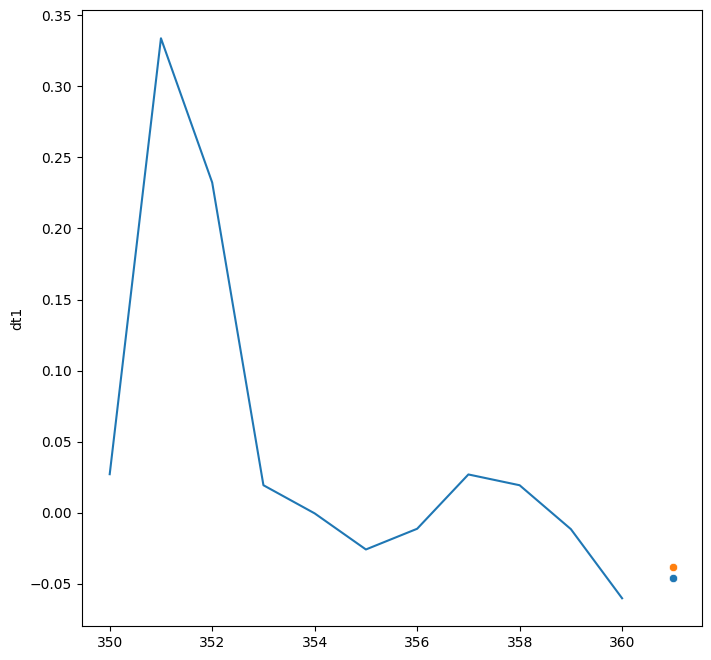

In [836]:
fig, axs = plt.subplots(figsize=(8,8))

sns.lineplot(
    x=dt1_all.index[
        350:-1
    ],
    y=train_y[350:],
)
sns.scatterplot(
    x=dt1_all.index[
        -1
    ],
    y=test_y,
)
sns.scatterplot(
    x=dt1_all.index[
        -1
    ],
    y=pred_gbr_dt1_all,
)

In [837]:
# reverse transform
dt1_rt = dt1_all_preserve.loc[train_y.index, "dt1"]

In [838]:
mean_absolute_error(dt1_rt.iloc[-1] + test_y, dt1_rt.iloc[-1] + pred_gbr_dt1_all)

0.00800674082356867

array([1.85399895e-03, 6.87714646e-03, 1.95544083e-03, 1.80997939e-04,
       1.17836561e-03, 5.80709722e-03, 2.52560708e-04, 6.96554490e-04,
       1.46068275e-03, 4.60435463e-04, 1.34107356e-03, 7.19425524e-04,
       6.91661188e-05, 5.94946901e-04, 4.01621442e-03, 3.42618272e-03,
       1.51261216e-03, 1.80275168e-03, 3.22150408e-03, 2.44876331e-03,
       8.54701710e-04, 1.73920324e-03, 4.91169541e-04, 4.46862313e-04,
       3.90164049e-03, 2.04763593e-03, 9.78538580e-04, 1.54306955e-03,
       1.11697054e-03, 1.26558623e-03, 4.18819168e-03, 1.77843249e-04,
       1.44176880e-03, 4.92926851e-05, 1.62323355e-04, 1.10811950e-03,
       1.31797377e-03, 1.06411380e-03, 4.53320064e-03, 5.49934501e-01,
       3.81761373e-01])

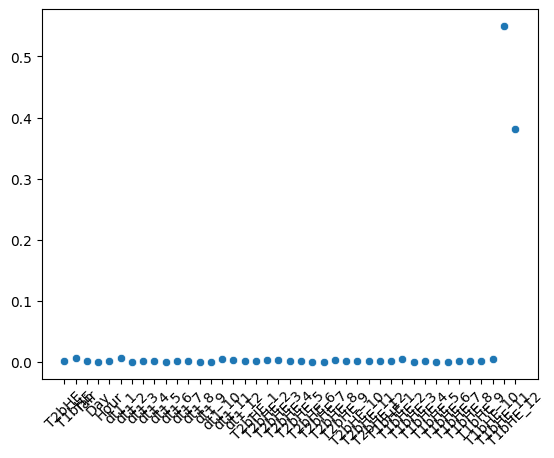

In [839]:
sns.scatterplot(x=X.columns, y=gbr_dt1_all.feature_importances_)
plt.xticks(rotation=45)
gbr_dt1_all.feature_importances_

# One step forecast for dataset with features above reports amazing results with mae=0.01905
# But as operating time increases fouling effect increases too. Lets check any effect of QbyIP on dt1

In [840]:
# some tests, acf and pacf for QbyIP to examine data

In [841]:
ts_qbyip_all = TimeSeries(qbyip_all)

In [842]:
ts_qbyip_all.run_tests()

Made <ADF> test:
 Fail to reject H0 hypothesis:
 Verdict: There is a unit root in data (non-stationary)
pvalue of test is 0.994

Made <KPSS> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The time series is non-stationary
pvalue of test is 0.010



/mnt/c/Users/Nikita/Desktop/codes/ML/IRTT_reactor/irtt_cooling_system/app/statistics.py:438: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  st, pvalue, *_ = kpss(self.data)


In [843]:
ccf_dt1_qbyip_all = scipy.signal.correlate(dt1_all_raw, qbyip_all)

Text(0.5, 1.0, 'pacf for dt1')

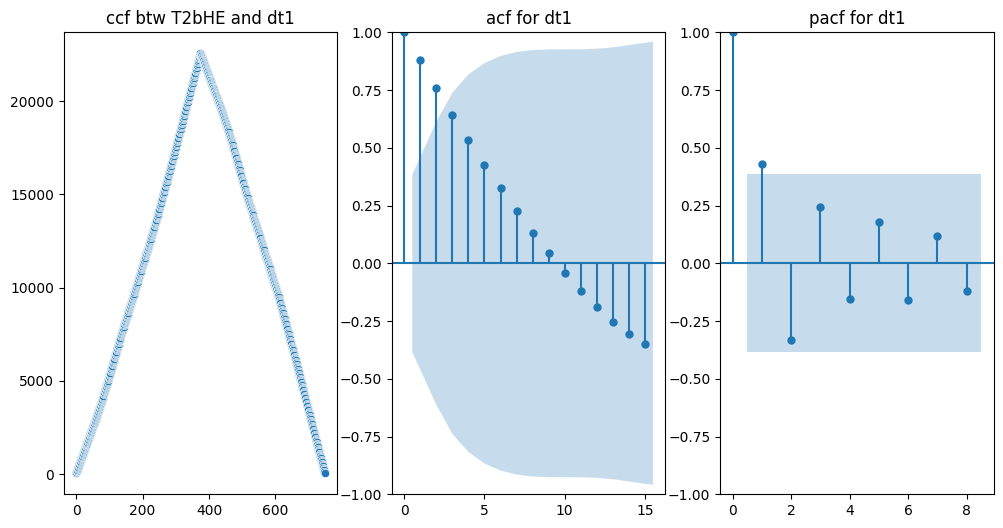

In [844]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.scatterplot(ccf_dt1_qbyip_all, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(qbyip_all), ax=axs[1])
axs[1].set_title("acf for dt1")

plot_pacf(pacf(qbyip_all), lags=8, ax=axs[2])
axs[2].set_title("pacf for dt1")


Text(0.5, 1.0, 'pacf for dt1 after diff')

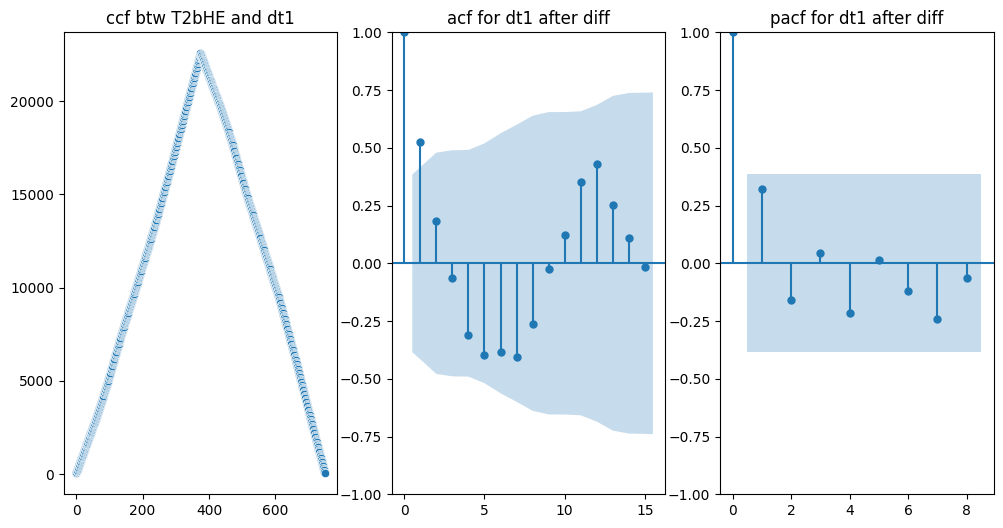

In [845]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.scatterplot(ccf_dt1_qbyip_all, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(qbyip_all.diff().dropna()), ax=axs[1])
axs[1].set_title("acf for dt1 after diff")

plot_pacf(pacf(qbyip_all.diff().dropna()), lags=8, ax=axs[2])
axs[2].set_title("pacf for dt1 after diff")


In [859]:
dt1_all2 = pd.concat([dt1_all_raw, t2bhe_all, df_all["T1bHE"], df_all["Tair"], qbyip_all.reset_index().drop("Timestamp", axis=1)], axis=1)

In [860]:
dt1_all2

,dt1,T2bHE,T1bHE,Tair,QbyIP
0,6.346328,23.855201,48.583810,4.028322,10.735460
1,6.394389,21.713469,46.725073,0.685720,10.674293
2,6.301845,22.046316,46.685364,-1.364985,10.655442
3,6.338153,20.142970,45.138733,-2.483790,10.623769
4,6.277125,18.980437,43.780384,-2.800000,10.603075
...,...,...,...,...,...
370,6.678996,20.779020,54.227969,8.446625,7.790070
371,6.698333,20.672673,54.206597,10.428330,7.739506
372,6.686794,20.823248,54.310517,11.777960,7.715087
373,6.626603,21.524435,54.676588,12.460188,7.705580


In [861]:
# take a diff to make data stationary

# presetve initial values
dt1_all_preserve2 = dt1_all2.loc[:, ["dt1", "T2bHE", "T1bHE", "QbyIP"]]

dt1_all2["dt1"] = dt1_all2["dt1"].diff()
dt1_all2["T2bHE"] = dt1_all2["T2bHE"].diff()
dt1_all2["T1bHE"] = dt1_all2["T1bHE"].diff()
dt1_all2["QbyIP"] = dt1_all2["QbyIP"].diff()

dt1_all2 = dt1_all2.dropna()

In [862]:
# adding 
# dt1_all["Month"] = df_all["Timestamp"].apply(lambda x: np.sin(2*np.pi*x.month / 12))
dt1_all2["Day"] = df_all["Timestamp"].apply(lambda x: np.sin(2*np.pi*x.day / x.days_in_month))
dt1_all2["Hour"] = df_all["Timestamp"].apply(lambda x: np.sin(2*np.pi*x.hour / 24))

dt1_all2 = dt1_all2.dropna()

/tmp/ipykernel_3283/3165313542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1_all2["Day"] = df_all["Timestamp"].apply(lambda x: np.sin(2*np.pi*x.day / x.days_in_month))
/tmp/ipykernel_3283/3165313542.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1_all2["Hour"] = df_all["Timestamp"].apply(lambda x: np.sin(2*np.pi*x.hour / 24))


In [868]:
dt1_all2

,dt1,T2bHE,T1bHE,Tair,QbyIP,Day,Hour,dt1_1,dt1_2,dt1_3,...,QbyIP_3,QbyIP_4,QbyIP_5,QbyIP_6,QbyIP_7,QbyIP_8,QbyIP_9,QbyIP_10,QbyIP_11,QbyIP_12
1,0.048061,-2.141733,-1.858736,0.685720,-0.061167,0.207912,-0.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.092544,0.332847,-0.039709,-1.364985,-0.018851,0.406737,0.000000,0.048061,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.036308,-1.903346,-1.546631,-2.483790,-0.031673,0.406737,0.500000,-0.092544,0.048061,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.061028,-1.162533,-1.358349,-2.800000,-0.020694,0.406737,0.866025,0.036308,-0.092544,0.048061,...,-0.061167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.036811,-0.699773,-0.794370,-2.800000,-0.014868,0.406737,1.000000,-0.061028,0.036308,-0.092544,...,-0.018851,-0.061167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.026937,0.178138,0.399490,8.446625,-0.030966,-0.571268,-0.500000,-0.011282,-0.025847,-0.000454,...,-0.016094,0.011908,-0.090014,-0.387255,-0.145949,-0.076361,-0.077448,-0.055168,-0.074272,0.028904
371,0.019338,-0.106347,-0.021373,10.428330,-0.050564,-0.571268,-0.866025,0.026937,-0.011282,-0.025847,...,0.071410,-0.016094,0.011908,-0.090014,-0.387255,-0.145949,-0.076361,-0.077448,-0.055168,-0.074272
372,-0.011539,0.150575,0.103920,11.777960,-0.024419,-0.571268,-1.000000,0.019338,0.026937,-0.011282,...,0.090826,0.071410,-0.016094,0.011908,-0.090014,-0.387255,-0.145949,-0.076361,-0.077448,-0.055168
373,-0.060191,0.701187,0.366071,12.460188,-0.009506,-0.571268,-0.866025,-0.011539,0.019338,0.026937,...,-0.030966,0.090826,0.071410,-0.016094,0.011908,-0.090014,-0.387255,-0.145949,-0.076361,-0.077448


In [717]:
# from acf data above we can see that there is a concrete period every 6 lags
# so we will create new lag features for each feature column

In [864]:
# shift for 6 lags to describe seasonings
cols = ["dt1", "T2bHE", "T1bHE", "QbyIP"]
lags = 12

for i in cols:
    for j in range(1,lags+1):
        dt1_all2[f"{i}_{j}"] = dt1_all2[i].shift(j)


In [875]:
dt1_all2 = dt1_all2.dropna()

In [876]:
# split it on X and y

X2 = dt1_all2.drop("dt1", axis=1)
y2 = dt1_all2["dt1"]

In [877]:
X_tr2 = dt1_all_ct.fit_transform(X2)

In [878]:
X_tr2.shape, y2.shape

((362, 54), (362,))

In [879]:
train_X2, train_y2, test_X2, test_y2 = X_tr2[:-1], y2[:-1], [X_tr2[-1]], [y2.iloc[-1]]


In [881]:
pred_gbr_dt1_all2 = []

gbr_dt1_all.fit(train_X2, train_y2)
pred_gbr_dt1_all2.append(gbr_dt1_all.predict(test_X2)[0])
# pred_gbr_dt1_all = np.array(pred_gbr_dt1_all)

In [882]:
pred_gbr_dt1_all2

[-0.007488843439049149]

<AxesSubplot: ylabel='dt1'>

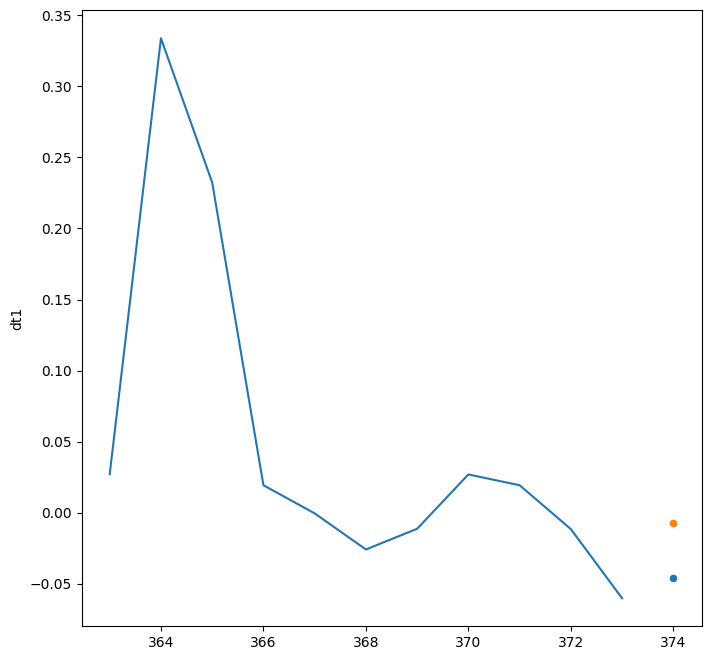

In [883]:
fig, axs = plt.subplots(figsize=(8,8))

sns.lineplot(
    x=dt1_all2.index[
        350:-1
    ],
    y=train_y2[350:],
)
sns.scatterplot(
    x=dt1_all2.index[
        -1
    ],
    y=test_y2,
)
sns.scatterplot(
    x=dt1_all2.index[
        -1
    ],
    y=pred_gbr_dt1_all2,
)

In [885]:
# reverse transform
dt1_rt2 = dt1_all_preserve2.loc[train_y2.index, "dt1"]

In [886]:
mean_absolute_error(dt1_rt2.iloc[-1] + test_y2, dt1_rt2.iloc[-1] + pred_gbr_dt1_all2)

0.038490105093299753

array([3.67616593e-04, 4.06158644e-03, 1.31614360e-03, 1.76701697e-03,
       1.67194328e-03, 1.17388397e-03, 1.56584251e-03, 6.85845774e-04,
       3.60464478e-03, 1.88831604e-04, 1.11149038e-03, 3.39971520e-04,
       7.04535522e-04, 6.82716246e-04, 1.15221948e-03, 8.02052248e-04,
       1.09657202e-03, 3.68079048e-03, 2.92842050e-03, 1.61052315e-03,
       2.11610804e-04, 8.38659673e-04, 7.23603255e-05, 2.73034160e-04,
       4.89327438e-03, 3.47318226e-04, 5.57700906e-04, 0.00000000e+00,
       2.94710997e-04, 6.00420580e-04, 2.60233120e-03, 5.22071165e-04,
       5.50287883e-05, 1.76664726e-06, 7.02839598e-04, 2.12097034e-03,
       4.46872684e-03, 5.90115663e-04, 1.36802264e-03, 4.56582721e-01,
       3.65238460e-01, 9.39719403e-02, 1.53931830e-03, 4.97133177e-04,
       6.72235456e-05, 6.67231983e-04, 1.38795741e-02, 2.95756005e-03,
       3.34206314e-03, 4.47811336e-03, 1.70929662e-03, 1.88369830e-03,
       6.12096627e-04, 1.53996044e-03])

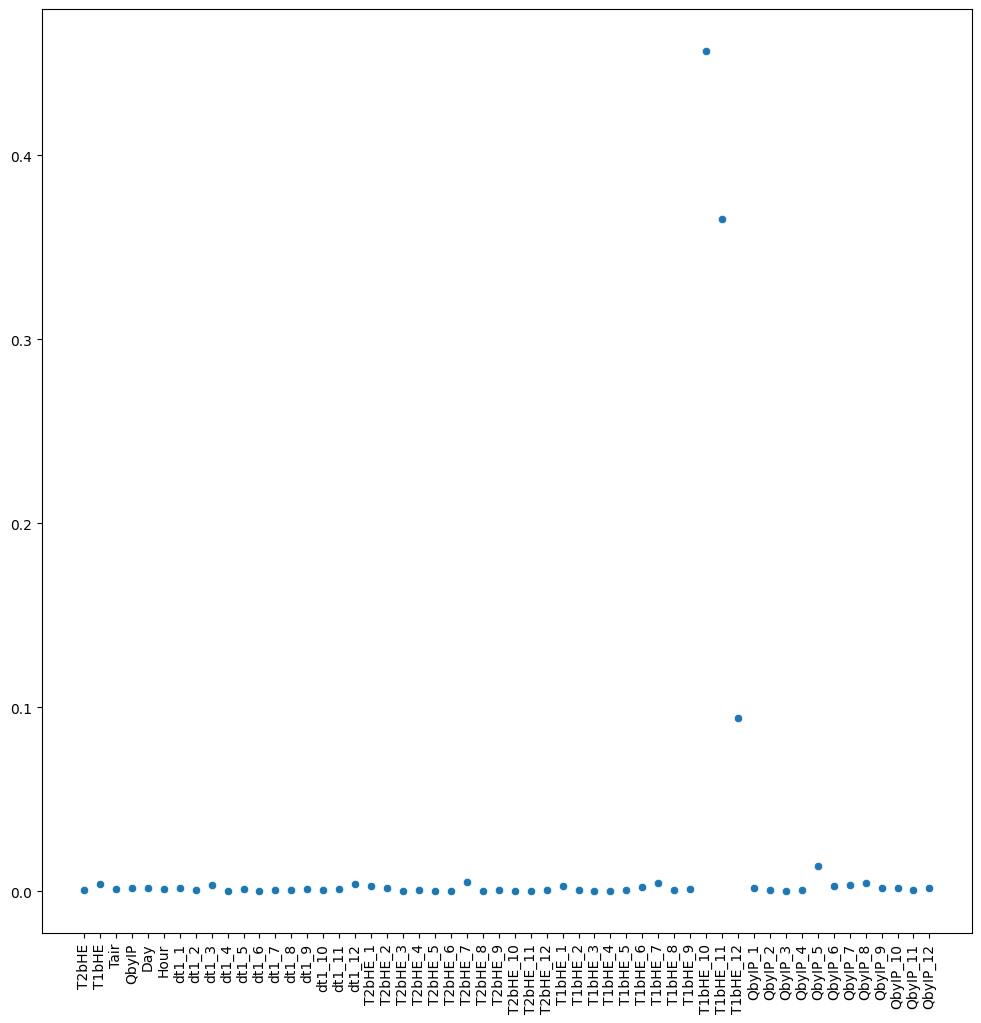

In [890]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=X2.columns, y=gbr_dt1_all.feature_importances_)
plt.xticks(rotation=90)
gbr_dt1_all.feature_importances_